# Assingment 5

**Piyush Chawla**

## TwoDimHard

This section analyses the **TwoDimHard** dataset. The clustering inference and the clustering evaluation follows the layout of assignment rubric. We start with the k-means implementation. Then we compute cohesion and separation metrics for the existing labels in this dataset. The K-means algorithm is run for n = 4 and n = 3 and both these scenarios are compared.

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score
from sklearn.metrics import silhouette_score
data = pd.read_csv('TwoDimHard.csv')

The functions below are the python implementation of k-means algorithm. **kmeans()** take the dataset and cluster number as the input and returns the cluster labels and final means obtained upon the full execution of k-means algorithm. Function **itr()** is a utility function which computes one iteration of the k-means (i.e. new means and new cluster labels). It can be seen that there is an infinite loop in the K-means algorithm. The stopping criterion is the same label assignment in two consecutive iterations. Another alternative could be the same means, which essentially is the exact same condition.

In [5]:
def itr(data,means,k):
    clss = []
    for i in range(len(data)):
        clss.append(-1)
        temp = 10000
        for j in range(len(means)):
            if euclidean(data[i],means[j]) < temp:
                temp = euclidean(data[i],means[j])
                clss[i] = j+1
    means = np.zeros((k,data.shape[1]))
    counts = [0]*k
    for i in range(len(clss)):
        means[clss[i]-1] = np.add(means[clss[i]-1],data[i])
        counts[clss[i]-1]+=1
    for i in range(k):
        means[i] = means[i]/counts[i]
    return clss,means

def _kmeans(data,k):
    indx = random.sample(range(len(data)),k)
    means = []
    clss = [-1]*len(data)
    for i in indx:
        means.append(data[i])
    means = np.array(means)
    
    while True:
        _clss,_means = itr(data,means,k)
        if clss==_clss:
            break
        clss = _clss
        means = _means
        
    return range(len(data)),clss

The function **colors()** plots clusters in 'TwoDimHard' dataset. It can be noticed that this function has been hardcoded to handle only two dimensions. So will skip its use in the later part of the assignment (Wine dataset).

In [32]:
colors = ['red','blue','green','yellow','orange']
def plot(data,clss,k,txt):
    _plot = []
    fig = plt.figure()
    for i in range(k+1):
        _plot.append([])
    for i in range(len(data)):
        _plot[clss[i]].append(data[i])
    for i in range(0,k+1):
        if len(_plot[i])==0:
            continue
        _plot[i] = np.array(_plot[i])
        plt.scatter(_plot[i][:,0],_plot[i][:,1],c = colors[i])
    plt.xlabel('X.1')
    plt.ylabel('X.2')
    fig.text(0.3,-0.03,txt)
    plt.show()
    

The function **CohSep()** computes per cluster SSE, overall SSE and SSB metrics for the clusters found by k-means.

In [10]:
def CohSep(data,clss,k):
    div = []
    for i in range(k):
        div.append([])
    for i in range(len(clss)):
        div[clss[i]].append(data[i])
    means = []
    for i in range(k):
        means.append( np.mean(np.array(div[i]),axis=0))
    
    sse = []
    ssb = 0
    center = np.mean(np.array(means),axis=0)
    for i in range(k):
        temp = 0
        for j in div[i]:
            temp+=euclidean(means[i],j)**2
        sse.append(temp)
        ssb+=len(div[i])*euclidean(center,means[i])**2
    for i in range(len(sse)):
        print('cluster =',i+1,'SSE',sse[i])
    print('Total SSE = ',np.sum(sse))
    print('SSB = ',ssb)
    print('SSE + SSB = ',np.sum(sse)+ssb)

Function **conf()** computes the cross-tabulation matrix. In cases where the number of clusters is different for the true and predicted labels, the code leaves some rows/columns with all zeros

In [8]:
def conf(pred,true):
    labs = max(len(set(pred)),len(set(true)))
    out = np.zeros((labs,labs))
    for i in range(len(pred)):
        out[pred[i]-1][true[i]-1]+=1
    return out

### A

The code below computes SSE and SSB values for the pre-defined clusters.

In [11]:
CohSep(np.array(data[['X.1','X.2']]),data['cluster']-1,4)

cluster = 1 SSE 0.31284771797726363
cluster = 2 SSE 0.9025336156215499
cluster = 3 SSE 2.4301187182254433
cluster = 4 SSE 1.910715466347143
Total SSE =  5.5562155181714
SSB =  23.863790948578302
SSE + SSB =  29.4200064667497


### B

The code below runs k-means on the dataset assuming that there are 4 clusters (n =4).

In [12]:
_id, clss = _kmeans(np.array(data[['X.1','X.2']]),4)

#### 1

We compute the SSE and SSB values for the new class labels computed by k-means() function. We can see that the SSE value got reduced from (5.56 to 4.89). This is because the dataset had overlapping clusters (which can be seen in the scatter plot below). However, the SSB value sees some minor increase. This might be due to the reason that now the number of elements in each cluster is different from the previous labeling. Also, the overall SSE+SSB value is reduced for k-means labeling.

In [13]:
CohSep(np.array(data[['X.1','X.2']]),np.array(clss)-1,4)

cluster = 1 SSE 1.8446030116907746
cluster = 2 SSE 1.4705341945503394
cluster = 3 SSE 0.5004805751481358
cluster = 4 SSE 1.0764850881678978
Total SSE =  4.892102869557148
SSB =  24.46052077370296
SSE + SSB =  29.35262364326011


#### 2
The code below plots both the original clustering classes and the ones computed by the **kmeans()** function. As discussed before, the first plot has some overlapping clusters. The K-means output does not have that issue, which is due to the way this algorithm works. (Gaussian mixture might give overlapping clusters, similar to the generated data)

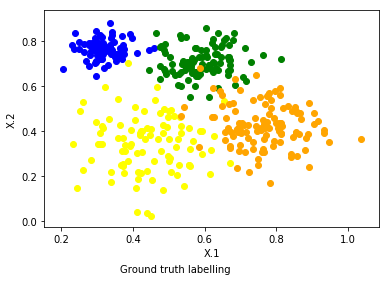

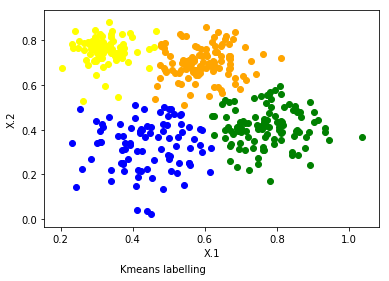

In [34]:
plot(np.array(data[['X.1','X.2']]),np.array(data['cluster']),4,'Ground truth labelling')
plot(np.array(data[['X.1','X.2']]),clss,4,'Kmeans labelling')

#### 3

The code below computes the cross-tabulation matrix. Here rows and correspond to predicted cluster labels and columns correspond to labels in the original dataset.

In [91]:
mat = conf(clss,list(data['cluster']))
print(mat)

[[  0.  98.   2.   8.]
 [  0.   0.  88.   2.]
 [ 89.   2.   4.   0.]
 [  0.   0.   3. 104.]]


### C

We now repeat our analysis by putting n = 3 in k-means code (3 clusters)

#### 1.

The code below computes the SSE and SSB values for 3 clusters. We see that SSE values for all the clusters increased (this obvious because now each cluster has more members than it had for n = 4, and also the clusters are not as compact as before). We also see is a reduction in the SSB value. However, the total SSE + SSB value is increased. Since the clusters lose compactness and overall SSE + SSB gets reduced, n = 4 seems a better option.

In [35]:
_id, clss = _kmeans(np.array(data[['X.1','X.2']]),3)
CohSep(np.array(data[['X.1','X.2']]),np.array(clss)-1,3)

cluster = 1 SSE 2.208190729993252
cluster = 2 SSE 1.9594008356114225
cluster = 3 SSE 4.393772046753148
Total SSE =  8.561363612357823
SSB =  21.806647084120662
SSE + SSB =  30.368010696478485


#### 2

The code below shows the scatter plot similar to part B.

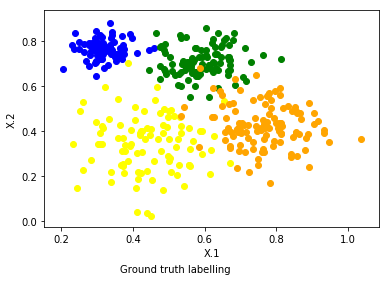

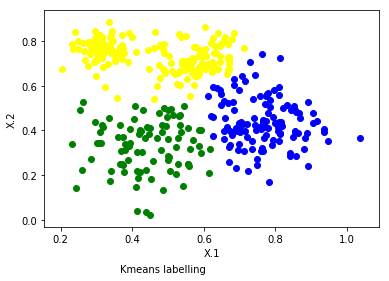

In [37]:
plot(np.array(data[['X.1','X.2']]),np.array(data['cluster']),4,'Ground truth labelling')
plot(np.array(data[['X.1','X.2']]),clss,3,'Kmeans labelling')

#### 3

The code below computes the cross-tabulation matrix. Again the rows correspond to the predicted labels and columns correspond to true labels. Since there are only three predicted clusters the last row is empty.

In [98]:
mat = conf(clss,list(data['cluster']))
print(mat)

[[  0.   6.   3. 110.]
 [  0.   0.  89.   3.]
 [ 89.  94.   5.   1.]
 [  0.   0.   0.   0.]]


## Wine Dataset

In this section, we do inference on the 'Wine' dataset. Since the **quality** column, in a couple of previous assignments, has been binned into two values, we treat that as the ground truth for the cluster labels. We explore three clustering methods (pre-implemented in the sklearn library), namely K-means, Agglomerative clustering, and Gaussian mixtures.

The code below normalizes the dataset and bins the quality column into two (<=5 and >5) values.

In [39]:
from sklearn.preprocessing import normalize
wine = pd.read_csv('winequality-red.csv',sep=';')
wine.iloc[0]
tmp = []

for i in range(len(wine)):
    if wine['quality'].iloc[i]<= 5:
        tmp.append(0)
    else:
        tmp.append(1)
wine['quality'] = tmp

for i in list(wine.keys()):
    if i == 'quality':
        continue
    else:
        wine[i] = normalize(np.array(wine[i]).reshape(1, -1))[0]

Computing SSE and SSB metrics for the existing labels (generated by binning the 'quality' column). The silhouette score, completeness and homogeneity values are also computed. We will use these values as the baseline.

In [47]:
CohSep(np.array(wine)[:,:-1],wine['quality'],2)
print()
print('Silhouette score = ',silhouette_score(np.array(wine)[:,:-1], wine['quality'], metric='euclidean'))
print()
print('Homogeneity = ',homogeneity_score(wine['quality'],list(wine['quality'])))
print()
print('Completeness = ',completeness_score(wine['quality'],list(wine['quality'])))

cluster = 1 SSE 0.8376862159405079
cluster = 2 SSE 0.7726100698813582
Total SSE =  1.6102962858218661
SSB =  0.046597875607361276
SSE + SSB =  1.6568941614292274

Silhouette score =  0.037661006051162654

Homogeneity =  1.0

Completeness =  1.0


### K-Means

This section uses the k-means implementation in python. We choose cluster number to be 2 (so that we can compare with the baseline). All other parameters are the default (changing these parameters does not affect the output considerably). The code below computes the clustering labels.

In [62]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(wine)[:,:-1])

In [63]:
CohSep(np.array(wine)[:,:-1],kmeans.labels_,2)
print()
print('Silhouette score = ',silhouette_score(np.array(wine)[:,:-1], kmeans.labels_, metric='euclidean'))
print()
print('Homogeneity = ',homogeneity_score(wine['quality'],list(kmeans.labels_)))
print()
print('Completeness = ',completeness_score(wine['quality'],list(kmeans.labels_)))

cluster = 1 SSE 0.5729951815763623
cluster = 2 SSE 0.711931583512176
Total SSE =  1.2849267650885383
SSB =  0.41551799326142413
SSE + SSB =  1.7004447583499624

Silhouette score =  0.2660740880763293

Homogeneity =  0.011596094863664173

Completeness =  0.012525047840037246


The code below computes the cross tabulation matrix and computes the accuracy using the matrix.

In [64]:
mat = conf(list(wine['quality']+1),kmeans.labels_+1)
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))

[[299. 445.]
 [241. 614.]]

accuracy = 0.5667479802748925


### Agglomerative Clustering

This section uses agglomerative clustering using all the default values (the default cluster number is 2). We use the same metrics used above.

In [65]:
clustering = AgglomerativeClustering().fit(np.array(wine)[:,:-1])

In [69]:
CohSep(np.array(wine)[:,:-1],kmeans.labels_,2)
print()
print('Silhouette score = ',silhouette_score(np.array(wine)[:,:-1], clustering.labels_, metric='euclidean'))
print()
print('Homogeneity = ',homogeneity_score(wine['quality'],list(clustering.labels_)))
print()
print('Completeness = ',completeness_score(wine['quality'],list(clustering.labels_)))
print()
mat = conf(list(wine['quality']+1),clustering.labels_+1)
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))

cluster = 1 SSE 0.5729951815763623
cluster = 2 SSE 0.711931583512176
Total SSE =  1.2849267650885383
SSB =  0.41551799326142413
SSE + SSB =  1.7004447583499624

Silhouette score =  0.24113451298449215

Homogeneity =  0.009901996955042262

Completeness =  0.010536914651343085

[[437. 307.]
 [598. 257.]]

accuracy = 0.5610520094562648


### Gaussian Mixture

This part uses Gaussian mixture model (with 2 components) and all the default values. The same metrics are used as above for evaluation.

In [120]:
mix = GaussianMixture(n_components=2,reg_covar=1e-06, max_iter = 1000,tol = 0.00001).fit(np.array(wine)[:,:-1])
labs = mix.fit_predict(np.array(wine)[:,:-1])
CohSep(np.array(wine)[:,:-1],labs,2)
print()
print('Silhouette score = ',silhouette_score(np.array(wine)[:,:-1], labs, metric='euclidean'))
print()
print('Homogeneity = ',homogeneity_score(wine['quality'],list(labs)))
print()
print('Completeness = ',completeness_score(wine['quality'],list(labs)))
print()
mat = conf(list(wine['quality']+1),labs+1)
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))

cluster = 1 SSE 0.7782891999966496
cluster = 2 SSE 0.6620989179785107
Total SSE =  1.4403881179751603
SSB =  0.2526964290863836
SSE + SSB =  1.6930845470615439

Silhouette score =  0.20421578283385594

Homogeneity =  0.01681832814239313

Completeness =  0.018759651566741854

[[457. 287.]
 [646. 209.]]

accuracy = 0.5821522314508818


## Observations

The table below summarizes all the metric results we obtained in this section.


| Clustering Method | SSE+SSB | Silhouttte | Homogeneity | Completeness | Accuracy | 
| --- | --- | --- | --- | --- | --- | --- |
| Baseline | 1.66 | 0.038 |1.0 | 1.0 |1.0|
| K-Means | 1.70 | .27 | 0.012| 0.013 | 0.567 |
| Agglomerative | 1.70 | 0.241 | 0.01| 0.011| 0.56 |
| Gaussian Mixture | 1.69 | 0.2| 0.017| 0.0188| 0.582|


No model gives satisfactory accuracy. This was expected because clustering models are not as powerful as classifiers like SVM etc. These models just use simple metrics like Euclidean distance or fitting data to Gaussian distributions etc.

We observer that Gaussian mixture performs best amongst all three when we see the accuracy. This model also has the lowest (marginally) SSE+SSB value. So we would go with the Gaussian mixture if we chose the number of the cluster to be 2 (even if we didn't have true labels since it has the best cohesion + separation value)
